# Prática IV

Eduardo Garcia Misiuk - 9293230 
Mauricio Caetano da Silva - 9040996

Datasets escolhidos: Titanic e Agro

# Primeira Parte: Titanic

### Carregando os dados

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

titanic = pd.read_csv('titanic.csv')

separator = "\n============================================================================================================\n"
columns = titanic.columns.tolist()

titanic.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Algoritmo de classificação

In [70]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std


def reg_clas(data, columns, target, regression=False):
    """
    Executa classificação ou regressão do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    regression: Boleano. True para realizar uma regressão e False para classificação
    ---------------------------------------------------------------
    Realiza a classificação/regressão em 4 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, e knn com k=5)
    Plot o gráfico de desempenho para cada classificador/regressor.
    Retorna um dicionário com os classificadores/regressores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    if regression:
        svm_l = SVR(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVR(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeRegressor(criterion='mse', splitter='best', min_samples_split=int(len(data)*0.05))
        knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    else:
        svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
        knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    
    clfs = [svm_l, svm_n, dt, knn]
    clfs_names = ['svm_linear', 'svm_poly', 'dt', 'knn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[], 'knn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            if regression:
                results[c_name].append( mean_squared_error(clf.predict(x_test), y_test) )
            else:
                results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores/regressores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos regressores - erro quadrático médio' if regression else \
            'Desempenho dos classificadores - acurácia'
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

### Questão 1)
**Reportar porcentagem de amostras com problema. Definir o que é problema no seu cenário. Problema pode ser valor ausente, inconsistente, ou outras formas que você acredita ser um problema. Especificar o problema por atributo, se você identificou problema nos atributos A e C, reportar a porcentagem de problema para cada um desses atributos.**

In [60]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [66]:
print("Quantidade de NaN por atributo:")
print(titanic.isna().sum())
print(separator)

print("Porcentagem de NaN por atributo:")
print(titanic.isna().sum()/len(titanic))

Quantidade de NaN por atributo:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Porcentagem de NaN por atributo:
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


Pela tabela da porcentagem de NaN em cada atributo acima indica, a base de dados não tem um grande problema com valores ausentes.
- O Atributo Age tem aproximadamente 20% de seus dados como NaN, porém ele é um dado que vemos como importante para a análise, portanto não podemos descartá-lo.
- O atributo Cabin, que indica a cabine do passageiro, é um dado com uma perda de aproximadamente 77% e não é muito importante para a análise.
- O atributo Embarked tem pouca perda, somente 2 instâncias sem valor, porém não é útil à análise.

Outro problema encontrado é a presença de outliers no atributo Fare. 75% de seus valores estão abaixo do valor 31, enquanto o maior valor é aproximadamente 512.

### Questão 2)
**Argumente se você acha que esses problemas têm origem sistemática ou aleatória.**

Por se basear em um desastre ocorrido, a ausência de valores pode se explicar pela perda dessa informação no acidente.

### Questão 3)
**Realize uma etapa de limpeza que você achar necessária. Comente as etapas realizadas. Por limpeza vide as atividades nos slides 13 em diante. Você pode achar apenas necessário fazer imputação dos dados ou então se forem poucas amostras com valores ausentes, remover essas amostras, mas sempre justifique o porque você fez isso.**

In [62]:
dirty = titanic.copy()
clean_with_nan = titanic.copy()

In [63]:
# Retirando atributos desnecessários
clean_with_nan.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)
clean_with_nan.head(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


- PassengerId foi retirado pois é somente uma chave primária para identificar os passageiros.
- Name, Cabin e Embarked foram retirados pois são inúteis na análise.
- Cabin foi retirado pois aproximadamente 77% de seus valores estão ausentes.

In [68]:
clean_mean = clean_with_nan.copy()
clean_median = clean_with_nan.copy()

# Removendo instâncias com NaN
clean_no_nan = clean_with_nan.dropna()

# Substituindo NaN pela média
clean_mean.fillna(value=clean_with_nan.mean(), axis=0, inplace=True)

# Substituindo NaN pela mediana
clean_median.fillna(value=clean_with_nan.median(), axis=0, inplace=True)

print("Sem NaN:\n")
print(clean_no_nan.describe(include='all'))
print(separator)

print("Substituindo NaN por Média\n")
print(clean_mean.describe(include='all'))
print(separator)

print("Substituindo NaN por Mediana\n")
print(clean_median.describe(include='all'))

Sem NaN:

          Survived      Pclass   Sex         Age       SibSp       Parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              Fare  
count   714.000000  
unique         NaN  
top           

Para podermos fazer experimentos com a classificação, temos 5 tabelas com os dados:
- dirty: sem remoção ou pré-processamento.
- clean_with_nan: com remoção de algumas colunas e sem remoção de instâncias com NaN.
- clean_no_nan: com remoção de algumas colunas e com remoção de instâncias com NaN.
- clean_mean: com remoção de algumas colunas e com substituição de instâncias com NaN pela média.
- clean_median: com remoção de algumas colunas e com substituição de instâncias com NaN pela mediana.

### Questão 4)
**Execute a função com os classificadores ou regressores, dependendo do seu problema, antes e depois da limpeza dos dados. Comente se o classificador conseguiu executar antes da limpeza ser realizada, e se houve melhora no desempenho.**

Como os algoritmos não rodam se há NaN nos dados, não rodaremos eles para as tabelas dirty e clean_with_nan.

Desempenho na tabela clean_no_nan


/home/misiuk/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


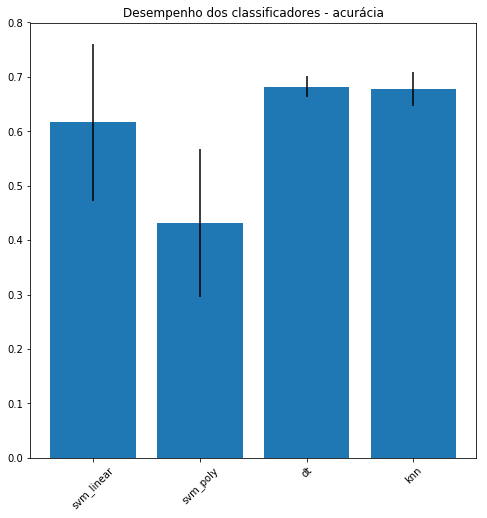



Desempenho na tabela clean_mean


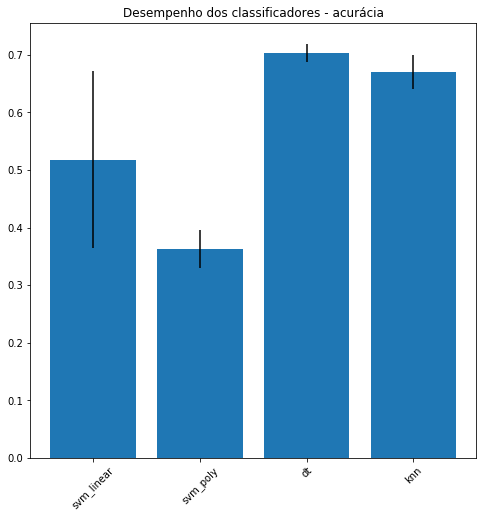



Desempenho na tabela clean_median


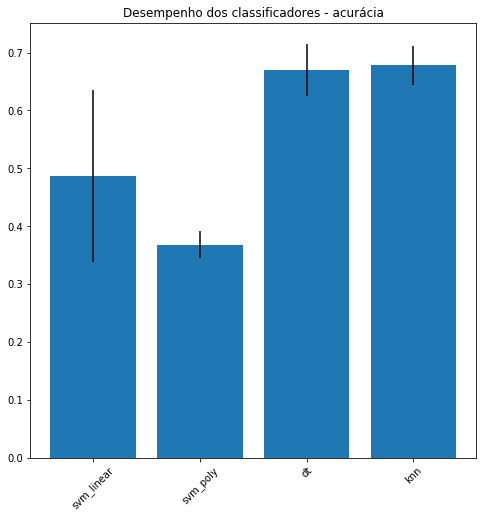

In [86]:
target = 0 # Atributo target: Survived
# Atributos: Pclass, Age, SibSp, Parch e Fare
cols = [1,3,4,5,6]

print("Desempenho na tabela clean_no_nan")
res_no_nan = reg_clas(clean_no_nan, cols, target, regression=False)
print(separator)

print("Desempenho na tabela clean_mean")
res_mean = reg_clas(clean_mean, cols, target, regression=False)
print(separator)

print("Desempenho na tabela clean_median")
res_median = reg_clas(clean_median, cols, target, regression=False)

Não conseguimos rodar na base sem limpeza. Vamos analisar qual base teve melhor resultado para cada algoritmo:
- svm_linear: a melhor acurácia ocorreu na base com somente a retirada dos NaN, mas a incerteza do resultado é relativamente grande, um pouco mais de 10 pontos percentuais, e a taxa de acerto não é tão boa.
- svm_poly: foi o algoritmo com menor acurácia e esta só diminui nas bases com substituição do NaN.
- dt: este algoritmo foi o melhor (entre os 4) para esta base: a incerteza foi pequena e o acerto nos 3 casos foi bom, sendo que na base com substituição pela média houve melhora no seu desempenho.
- knn: um dos mais estáveis para a base, se mantendo um pouco abaixo de 70% de acerto em todas as bases. Teve um desempenho minimamente melhor na base com substituiçao pela mediana (em relação à base que se retirou os NaN).